**673 Project1 - Part1**

Abhinav Bhamidipati  - abhinav7 - 120424731

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


https://drive.google.com/drive/folders/1YTjgdM5M6nuYKZabaCwHQ9voHGQTVw3f?usp=drive_link

contains the folder from where the video is taken and the frames are saved to.

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**Extract Individual Frames from the Video.**
* Using OpenCV we extract frames from the video
* The frames are saved in folder using cv2.imwrite
* The video is released after all the frames are extracted.

In [ ]:
video = cv2.VideoCapture("/content/drive/MyDrive/673/abhinav7_project1_part1/object_tracking.mp4")

#extracting frames
frame_no = 0

while True:
    success, frame = video.read()

    # Break the loop if the video has ended
    if not success:
        break

    cv2.imwrite("/content/drive/MyDrive/673/abhinav7_project1_part1/1/frame_%d.png" % frame_no, frame)
    # print("frame no %d" %frame_no)
    frame_no += 1

video.release()
print("Frames Extracted Successfully!!")

Frames Extracted Successfully!!


Viewing the Extracted Frames

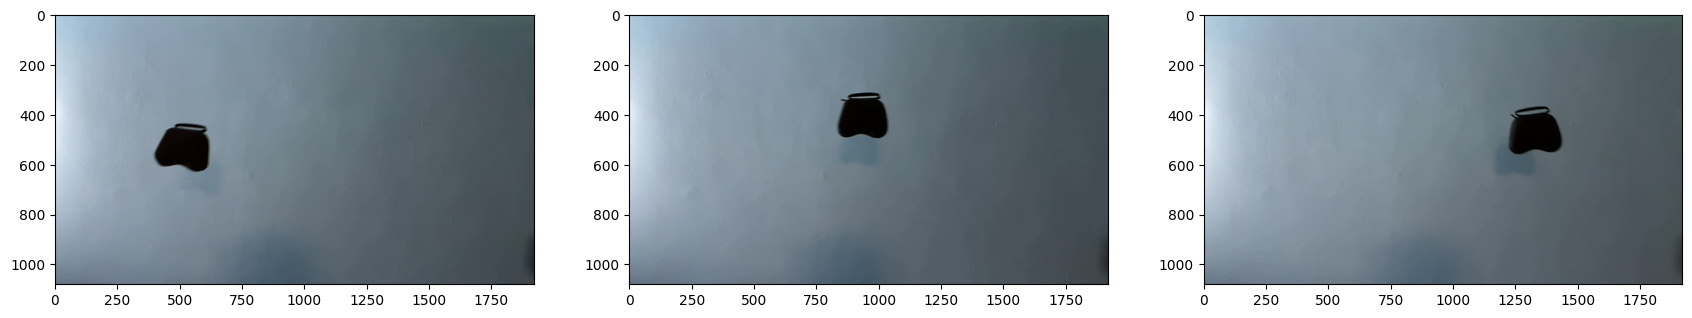

In [ ]:
#some extracted frames
f_1 = cv2.imread('/content/drive/MyDrive/673/abhinav7_project1_part1/1/frame_357.png')
f_2 = cv2.imread('/content/drive/MyDrive/673/abhinav7_project1_part1/1/frame_457.png')
f_3 = cv2.imread('/content/drive/MyDrive/673/abhinav7_project1_part1/1/frame_557.png')

plt.figure(figsize=(21, 4))

plt.subplot(1, 3, 1)
plt.imshow(f_1)
plt.subplot(1, 3, 2)
plt.imshow(f_2)
plt.subplot(1, 3, 3)
plt.imshow(f_3)

plt.show()

**Extracting the Pixels of the moving object using color.**

* As the moving object is in a dark color, so we extract the darker pixels with RGB values upto (25, 25, 25).
* We then convert all these pixels to black. The RGB values of Black is (0, 0, 0).
* To differentiate the moving object, we turn all the other pixels to white with RGB value (255, 255, 255) the complete opposite.
* To calculate the centroid of object in every frame, we find the mean of all the black pixels present in x and y coordinates of image.
* A point is added to the image at the centroid coordinates.

In [ ]:
folder_path = "/content/drive/MyDrive/673/abhinav7_project1_part1/1"

output_folder = "/content/drive/MyDrive/673/abhinav7_project1_part1/2"
os.makedirs(output_folder, exist_ok=True)

# list to store centroid coordinates
centroids_list = []

for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)

    img = cv2.imread(image_path)

    # Create a new image with the same shape as the original image
    new_img = np.zeros_like(img)

    # Find pixels with rgb < 25
    black_pixels_y, black_pixels_x = np.where(np.all(img < 25, axis=-1))

    # Set pixels with rgb < 25 to black
    new_img[black_pixels_y, black_pixels_x] = [0, 0, 0]

    # Set pixels with rgb > 25 to white
    new_img[np.logical_not(np.all(img < 30, axis=-1))] = [255, 255, 255]

    # Calculate centroid
    if black_pixels_x.size > 0:
        centroid_x = int(np.mean(black_pixels_x))
        centroid_y = int(np.mean(black_pixels_y))

        # Add a point at the centroid
        cv2.circle(new_img, (centroid_x, centroid_y), radius=10, color=[0, 0, 255], thickness=cv2.FILLED)

        # append all the calculated centroids
        centroids_list.append((centroid_x, centroid_y))

    # output_path = os.path.join(output_folder, filename)
    # cv2.imwrite(output_path, new_img)

print("Processing completed.")


Processing completed.


View some frames with moving object in black and also the centroid.

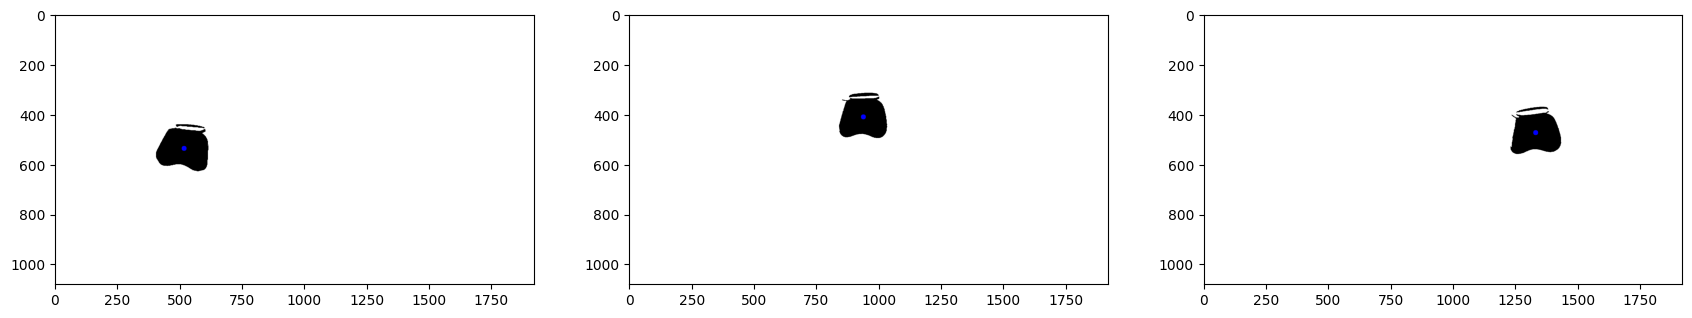

In [ ]:
#some extracted frames with centroids
f_4 = cv2.imread('/content/drive/MyDrive/673/abhinav7_project1_part1/2/frame_357.png')
f_5 = cv2.imread('/content/drive/MyDrive/673/abhinav7_project1_part1/2/frame_457.png')
f_6 = cv2.imread('/content/drive/MyDrive/673/abhinav7_project1_part1/2/frame_557.png')

plt.figure(figsize=(21, 4))

plt.subplot(1, 3, 1)
plt.imshow(f_4)
plt.subplot(1, 3, 2)
plt.imshow(f_5)
plt.subplot(1, 3, 3)
plt.imshow(f_6)

plt.show()

We can create a scatter plot using the x and y values of the calculated centroid for every frame.

We assume the top left corner as (0,0).

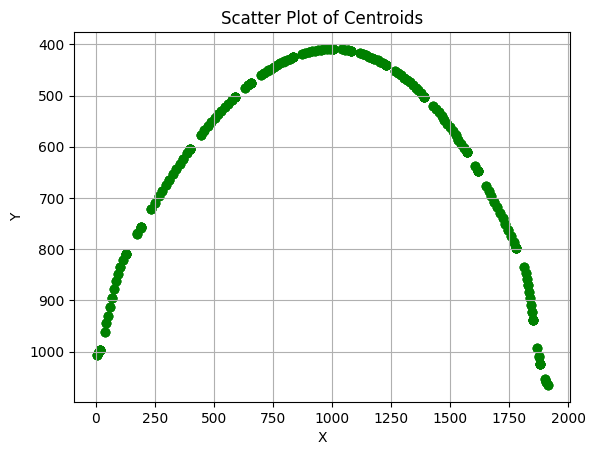

In [ ]:
x_values, y_values = zip(*centroids_list)

# Plot the points
plt.scatter(x_values, y_values, color='green')

plt.xlabel('X')
plt.ylabel('Y')

# inverting the y-axis to get (0,0) on top left
plt.gca().invert_yaxis()

plt.title('Scatter Plot of Centroids')
plt.grid(True)
plt.show()

**Using 'Standard Least Square' method we find the parabola Equation.**


Ax = y

here, A is a matrix with columns  [  xₙ^2  | xₙ  |  1 ]

x = [ a, b, c]

y is a Column containing y1, y2....yn

The least square Solution can be obtained using

x = (AᵀA)^{-1} * Aᵀ * y






In [ ]:
# Converting tuple to numpy arrays
x_c = np.array(x_values)
y_c = np.array(y_values)

# Forming Matrices
A = np.column_stack((x_c * x_c, x_c, np.ones(len(x_c))))

# Least Square Method
X = (np.linalg.inv(A.T @ A)) @ A.T @ y_c

print ('[a, b, c] = ', X)

[a, b, c] =  [ 6.44700037e-04 -1.23819885e+00  9.92160428e+02]




**Given x= 1000, we find the value of y using the equation.**

y = a\^2 + bx + c



In [ ]:
a, b, c = X

x=1000 #given

# Equation of Parabola
y = a *(x*x) + b*x + c

print(f'Parabola equation -> y = {a}x^2 + {b}x + {c}')

print('y = ', y, 'for x = 1000')

Parabola equation -> y = 0.000644700037493034x^2 + -1.2381988482771615x + 992.160427644769
y =  398.6616168606415 for x = 1000


**We now plot the above parabola equation.**

y_p is all the y points created using the parabola equation using x_c(x values of centroid)

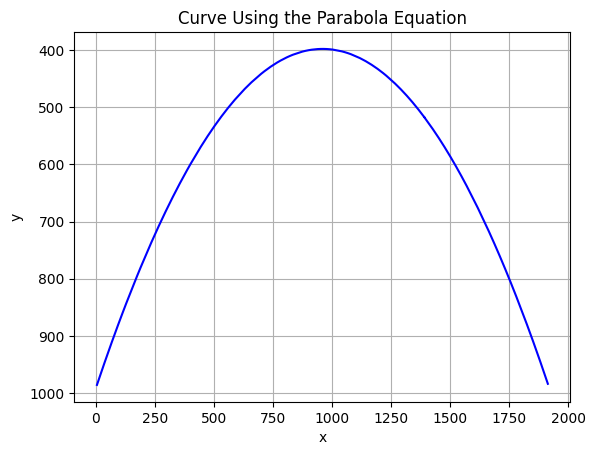

In [ ]:
y_p = a *(x_c*x_c) + b*x_c + c

plt.plot(x_c, y_p, color='blue', linestyle='-')

plt.title('Curve Using the Parabola Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

**We fit the Parabola curve through the found centroids**

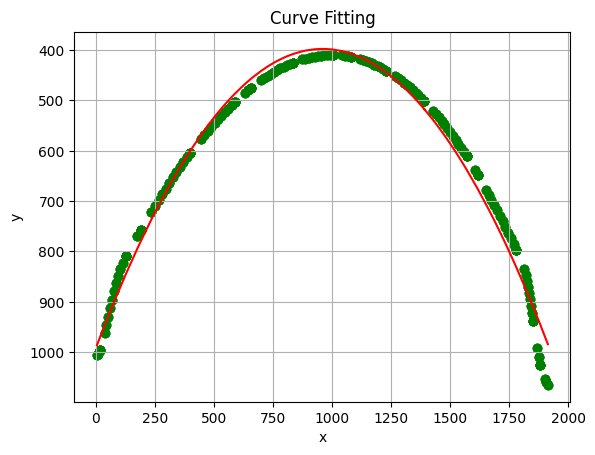

In [ ]:
plt.scatter(x_values, y_values, color='green')
plt.plot(x_c, y_p, color='red')

plt.title('Curve Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_yaxis()
plt.grid(True)

plt.show()

**Plotting the equation on any frame from the video.**

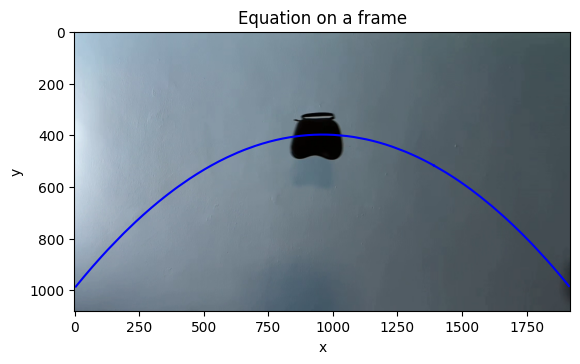

In [ ]:
plt.plot(x_c, y_p, color='blue', linestyle='-')
plt.imshow(f_2)
plt.title('Equation on a frame')
plt.xlabel('x')
plt.ylabel('y')

plt.show()